### Libraries

In [ ]:
!pip install vk_api

     |████████████████████████████████| 48 kB 2.5 MB/s 


In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import vk_api
import datetime
import time


### VK API

1. Получение токена https://oauth.vk.com/authorize?client_id=5440699&display=page&redirect_uri=vk.com/callback&response_type=token&v=5.80&scope=offline
Ответом будет служить подобная строка в браузере:
https://api.vk.com/blank.html#access_token=d4043818e4b2a6c21b83ecb7fe1b1f7ce646232ee98938970ab8862749dd710e94b18f90975f4d41ea25f&expires_in=86400&user_id=133405960 где набор символов после "access_token=" и до "&expires_in=86400" и есть токен. В конце указывается id (идентификатор в социальной сети Вконтакте) пользователя.
2. Необходимо к ознакомлению:
https://dev.vk.com/method/utils.getShortLink
https://dev.vk.com/method/utils.getLinkStats



In [ ]:
token = '95c141b46601ae807c5c5a95179354006c57c77929839a4fd77c03a97287bd82fc9f45d17b997294a1611'

In [ ]:
link = 'https://docs.google.com/forms/d/e/1FAIpQLSfKtUbT3qzkRLLYP0tOfvlRHqiUH3as0Mi3mV06Yi8poCcw1Q/viewform'

In [ ]:
vk = vk_api.VkApi(token = token)
vk._auth_token()



### Functions


In [ ]:
def get_token():
    link_token = 'https://oauth.vk.com/authorize?client_id=5440699&display=page&redirect_uri=vk.com/callback&response_type=token&v=5.80&scope=offline'
    return 'Use this link to get your token. It will be after "access_token=" and before "&expires_in=86400":', str(link_token)
  
def parse_data_from_table(file_name, sheet_number = None, column = None) -> list:
  if sheet_number is None or column is None:
    raise ValueError("Column or Sheet number where abbreviations are stored should be included in the input")
  if ".xlsx" not in file_name:
    file_name += ".xlsx"
  data = pd.read_excel(file_name, sheet_name= sheet_number)
  data = [x for x in data[data.columns[column]]]
  

  return data


def create_unique_link(abbreviations: list, add_link: str) -> list:
  if abbreviations is str:
    raise ValueError("abbreviation should be put into a list")

  temp_list = []
  # фильтрация абревиатур
  for abb in abbreviations:
    if str(abb) == 'nan':
      temp_list.append('')
    else:
        temp_list.append(add_link+ '?utm_source=' + abb)
  return temp_list
  

def create_short_links(links:list, private=0) -> list:
  #links should be generated via the function: create_short_links
  #private=1 if it is for private use only
  
  if links is not None:
    short_links = []
    for i in range(len(links)):
      time.sleep(0.5)
      l = links[i]
    
      if l is not None and l != "" and l != " " :
        short_links.append(vk.method("utils.getShortLink", {'url': l, 'private': private})['short_url'])
  else:
    raise ValueError("Column where abbreviations are stored should be included in the input")
    return None

  return short_links
  

def view_stats(key, interval='day', intervals_count=90, extended=0):
  #extended=1 if sex, age, country, city of viewers are needed
  #intervals_count cannot be set as 0
  key = key[14:]
  dict_stats = vk.method("utils.getLinkStats", {'key': key, 'interval': interval, 'extended': extended, 'intervals_count': intervals_count})['stats']
  stat = []
  for list in dict_stats:
    t_arr = [datetime.datetime.utcfromtimestamp(list['timestamp']).strftime('%d.%m.%Y'), list['views']]
    stat.append(t_arr)
  stat.reverse()
  return stat
  
def visualize_stats(key, x_name ='', y_name = 'Views', title_name= ""):
  #visualization of stats
    if title_name == "": 
      title_name = key

    dataFrame = view_stats(key, intervals_count=10)

    df = pd.DataFrame(dataFrame,  columns=[x_name,title_name])

    graph = df.plot(x_name, title_name)
    
    graph.set_title(title_name)
    plt.xticks(rotation = 45)
    graph.set_ylabel('Views')
    graph.grid()
    plt.show()

### Test

In [ ]:
abb = parse_data_from_table(file_name="partners.xlsx", sheet_number=1,column=1)
abb.append('viewform')
abb

[nan,
 nan,
 'it_works',
 'career_hse',
 'career_mipi',
 'cc_fin',
 'cc_mipi',
 'training_mipi',
 'career_bauman',
 'career_n_entrepreneurship',
 'inst_inf_tech',
 'career_mirea',
 'sno_fin',
 'cc_guu',
 'ds_ru',
 'datapedia',
 'datascience',
 'fu_case_school',
 'fu_case_club',
 'hse_case_club',
 'brainz_croc',
 nan,
 nan,
 'case_club',
 'career_ideit',
 'fairway',
 'sno',
 'cvsk',
 'ss',
 'ideit',
 'viewform']

In [ ]:

data = create_unique_link(abb, link)

#data.append("https://docs.google.com/forms/d/e/1FAIpQLSfKtUbT3qzkRLLYP0tOfvlRHqiUH3as0Mi3mV06Yi8poCcw1Q/viewform")
#data = ["https://docs.google.com/forms/d/e/1FAIpQLSfKtUbT3qzkRLLYP0tOfvlRHqiUH3as0Mi3mV06Yi8poCcw1Q/viewform"]
data


['',
 '',
 'https://docs.google.com/forms/d/e/1FAIpQLSfKtUbT3qzkRLLYP0tOfvlRHqiUH3as0Mi3mV06Yi8poCcw1Q/viewform?utm_source=it_works',
 'https://docs.google.com/forms/d/e/1FAIpQLSfKtUbT3qzkRLLYP0tOfvlRHqiUH3as0Mi3mV06Yi8poCcw1Q/viewform?utm_source=career_hse',
 'https://docs.google.com/forms/d/e/1FAIpQLSfKtUbT3qzkRLLYP0tOfvlRHqiUH3as0Mi3mV06Yi8poCcw1Q/viewform?utm_source=career_mipi',
 'https://docs.google.com/forms/d/e/1FAIpQLSfKtUbT3qzkRLLYP0tOfvlRHqiUH3as0Mi3mV06Yi8poCcw1Q/viewform?utm_source=cc_fin',
 'https://docs.google.com/forms/d/e/1FAIpQLSfKtUbT3qzkRLLYP0tOfvlRHqiUH3as0Mi3mV06Yi8poCcw1Q/viewform?utm_source=cc_mipi',
 'https://docs.google.com/forms/d/e/1FAIpQLSfKtUbT3qzkRLLYP0tOfvlRHqiUH3as0Mi3mV06Yi8poCcw1Q/viewform?utm_source=training_mipi',
 'https://docs.google.com/forms/d/e/1FAIpQLSfKtUbT3qzkRLLYP0tOfvlRHqiUH3as0Mi3mV06Yi8poCcw1Q/viewform?utm_source=career_bauman',
 'https://docs.google.com/forms/d/e/1FAIpQLSfKtUbT3qzkRLLYP0tOfvlRHqiUH3as0Mi3mV06Yi8poCcw1Q/viewform?utm_sour

In [ ]:
links = create_short_links(data)
links



['https://vk.cc/cbcYsA',
 'https://vk.cc/cbfQxC',
 'https://vk.cc/cbfQxH',
 'https://vk.cc/cbfQxR',
 'https://vk.cc/cbfQxU',
 'https://vk.cc/cbfQxW',
 'https://vk.cc/cbfQxX',
 'https://vk.cc/cbfQy2',
 'https://vk.cc/cbfQy3',
 'https://vk.cc/cbfQy8',
 'https://vk.cc/cbfQyb',
 'https://vk.cc/cbfQyf',
 'https://vk.cc/cbfQyj',
 'https://vk.cc/cbfQyn',
 'https://vk.cc/cbfQyr',
 'https://vk.cc/cbfQyw',
 'https://vk.cc/cbfQyD',
 'https://vk.cc/cbfQyI',
 'https://vk.cc/cbfQyY',
 'https://vk.cc/cbfQz7',
 'https://vk.cc/cbfQzb',
 'https://vk.cc/c6tKFB',
 'https://vk.cc/c6tKGT',
 'https://vk.cc/c6tKHY',
 'https://vk.cc/c6tKMe',
 'https://vk.cc/cbfQzy',
 'https://vk.cc/cbfRBZ']

In [ ]:
abb = [x for x in abb if str(x) != "nan"]
data = [x for x in data if str(x) != "nan"]

dict = {}
for i in range(len(abb)):
  dict[links[i]] = abb[i]
dict

{'https://vk.cc/c6tKFB': 'fairway',
 'https://vk.cc/c6tKGT': 'sno',
 'https://vk.cc/c6tKHY': 'cvsk',
 'https://vk.cc/c6tKMe': 'ss',
 'https://vk.cc/cbcYsA': 'it_works',
 'https://vk.cc/cbfQxC': 'career_hse',
 'https://vk.cc/cbfQxH': 'career_mipi',
 'https://vk.cc/cbfQxR': 'cc_fin',
 'https://vk.cc/cbfQxU': 'cc_mipi',
 'https://vk.cc/cbfQxW': 'training_mipi',
 'https://vk.cc/cbfQxX': 'career_bauman',
 'https://vk.cc/cbfQy2': 'career_n_entrepreneurship',
 'https://vk.cc/cbfQy3': 'inst_inf_tech',
 'https://vk.cc/cbfQy8': 'career_mirea',
 'https://vk.cc/cbfQyD': 'fu_case_club',
 'https://vk.cc/cbfQyI': 'hse_case_club',
 'https://vk.cc/cbfQyY': 'brainz_croc',
 'https://vk.cc/cbfQyb': 'sno_fin',
 'https://vk.cc/cbfQyf': 'cc_guu',
 'https://vk.cc/cbfQyj': 'ds_ru',
 'https://vk.cc/cbfQyn': 'datapedia',
 'https://vk.cc/cbfQyr': 'datascience',
 'https://vk.cc/cbfQyw': 'fu_case_school',
 'https://vk.cc/cbfQz7': 'case_club',
 'https://vk.cc/cbfQzb': 'career_ideit',
 'https://vk.cc/cbfQzy': 'ideit'

https://vk.cc/cbfQxH career_mipi


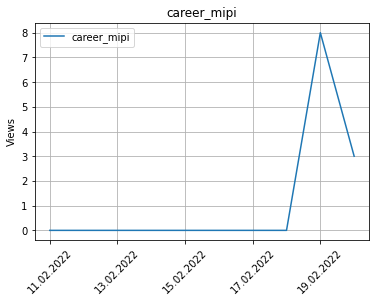

In [24]:
i = 2
print(links[i], dict[links[i]])
visualize_stats(links[i], title_name=dict[links[i]])